23:50:20 - cmdstanpy - INFO - Chain [1] start processing
23:50:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Kunal\AppData\Local\Temp\ipykernel_18556\542053063.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


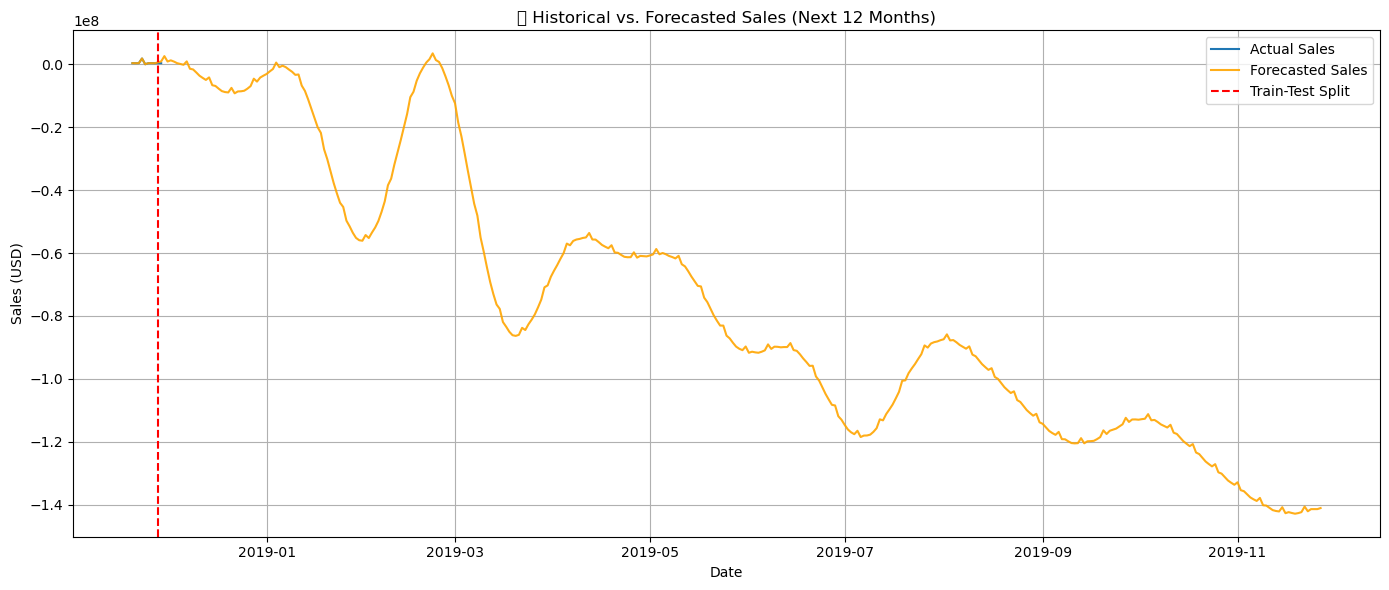

📊 Forecast Accuracy Metrics:
✅ MAE:  417476.39
✅ RMSE: 446346.29
✅ MAPE: 106.01%


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Load prepared and cleaned sales dataset
df = pd.read_csv("processed_time_series_sales.csv")
df['date'] = pd.to_datetime(df['date'])

# Step 2: Format for Prophet
df_prophet = df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

# Step 3: Train-Test Split (80/20)
split_point = int(len(df_prophet) * 0.8)
train = df_prophet[:split_point]
test = df_prophet[split_point:]

# Step 4: Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(train)

# Step 5: Predict for next 365 days (1 year)
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# Step 6: Plot actual vs. forecast
plt.figure(figsize=(14, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='orange', alpha=0.9)
plt.axvline(x=df_prophet['ds'][split_point], color='red', linestyle='--', label='Train-Test Split')
plt.title("📈 Historical vs. Forecasted Sales (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Evaluate model performance on test data
compare_df = forecast[['ds', 'yhat']].set_index('ds').join(test.set_index('ds'))
compare_df.dropna(inplace=True)

mae = mean_absolute_error(compare_df['y'], compare_df['yhat'])
rmse = np.sqrt(mean_squared_error(compare_df['y'], compare_df['yhat']))
mape = np.mean(np.abs((compare_df['y'] - compare_df['yhat']) / compare_df['y'])) * 100

print("📊 Forecast Accuracy Metrics:")
print(f"✅ MAE:  {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAPE: {mape:.2f}%")

# Step 8: Save forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("future_sales_forecast.csv", index=False)
